In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sklearn

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# # Set the kernel to use
# # Replace 'tf' with the name of your kernel
# import os
# os.environ['JUPYTER_KERNEL_NAME'] = 'tf'


In [22]:
df = pd.read_csv('stroke.csv')

In [23]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [24]:
df.drop('id',axis=1,inplace=True)

In [25]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [26]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [27]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [28]:
df_continuous = df[['age', 'avg_glucose_level', 'bmi']]

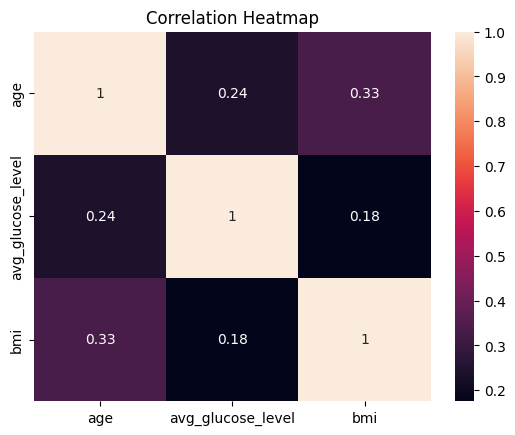

In [29]:
sns.heatmap(df_continuous.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

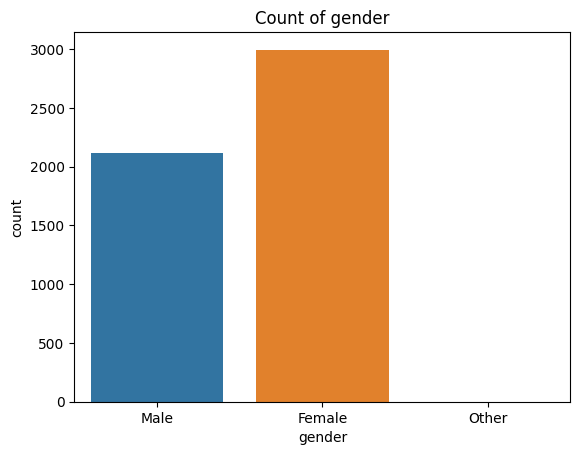

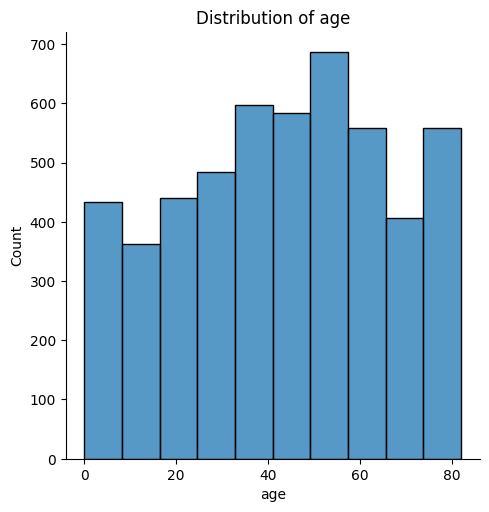

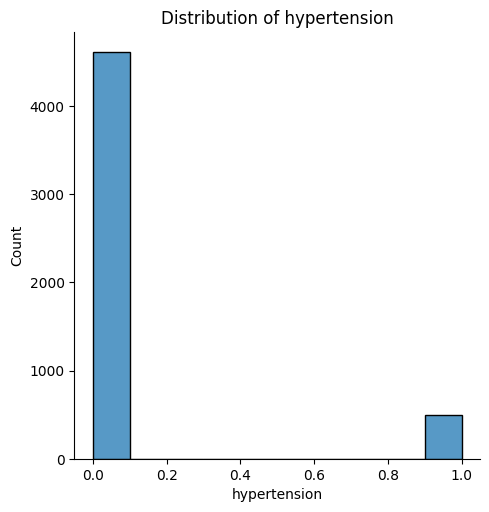

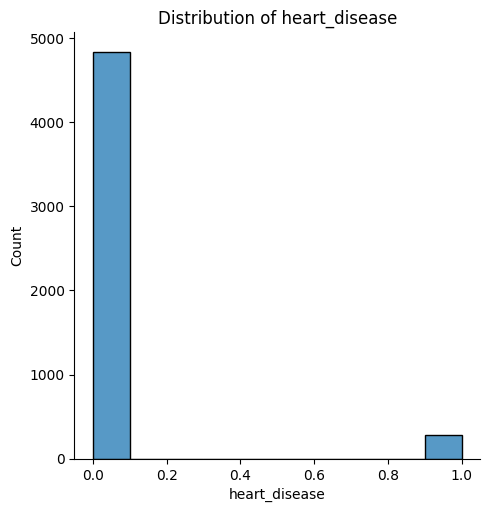

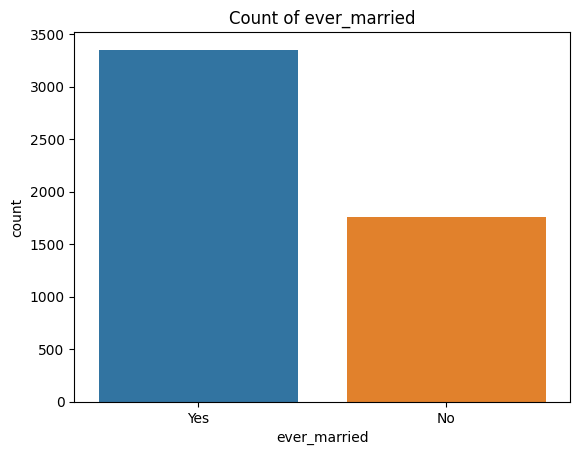

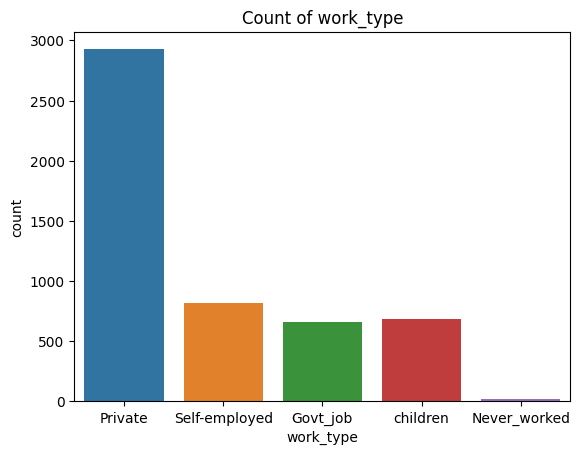

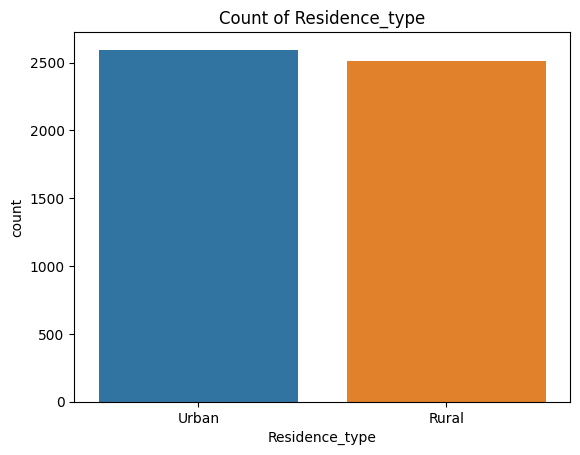

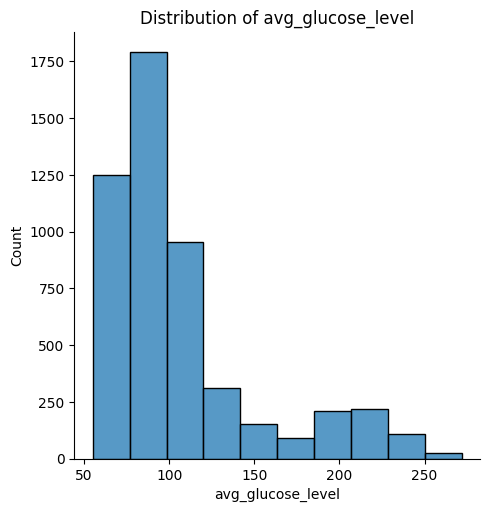

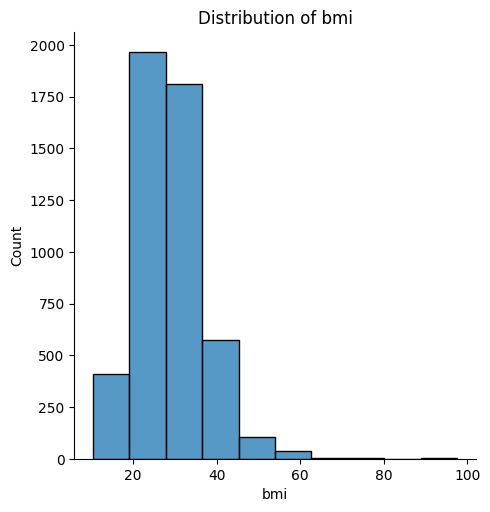

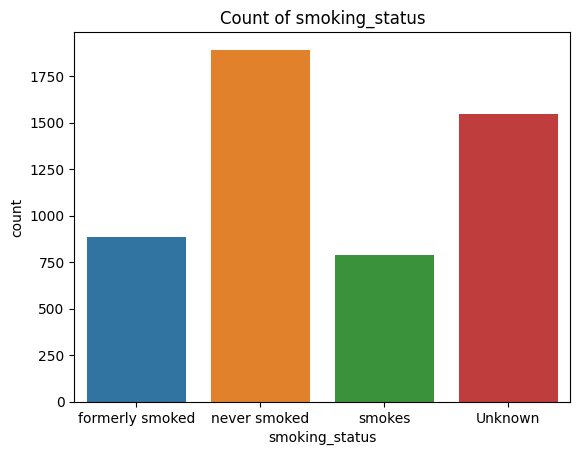

In [11]:
for column in df.columns:
    if column != 'stroke':
        if df[column].dtype != 'O':
            sns.displot(df[column], kde=False, bins=10)
            plt.title(f'Distribution of {column}')
            plt.show()
        else:
            sns.countplot(data=df, x=column)
            plt.title(f'Count of {column}')
            plt.show()

In [30]:
num_other_gender = df[df['gender'] == 'Other'].shape[0]

# Print the number of rows where the gender is 'Other'
print(f'The number of rows where the gender is Other is {num_other_gender}')

#remove gender = other 
df =df[df['gender'] != 'Other']


The number of rows where the gender is Other is 1


In [31]:
df_unknownsmoker = df[df['smoking_status'] == 'Unknown']
stroke_counts_unknownsmoker = df_unknownsmoker['stroke'].value_counts()
print(stroke_counts_unknownsmoker)

stroke
0    1497
1      47
Name: count, dtype: int64


In [32]:
# Calculate the mean of non-NaN values in the bmi column
bmi_mean = df['bmi'].mean()
print(bmi_mean)

stroke_mean_bmi = df.loc[df['stroke'] == 1, 'bmi'].mean()
print(stroke_mean_bmi)

nonstroke_mean_bmi = df.loc[df['stroke'] == 0, 'bmi'].mean()
print(nonstroke_mean_bmi)

df.loc[(df['stroke'] == 1) & (df['bmi'].isnull()), 'bmi'] = stroke_mean_bmi
df.loc[(df['stroke'] == 0) & (df['bmi'].isnull()), 'bmi'] = nonstroke_mean_bmi

df.isnull().sum()

# Fill the NaN values in the bmi column with the mean value
#df['bmi'].fillna(bmi_mean, inplace=True)

28.894559902200488
30.471291866028707
28.82443072994254


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

stroke
0    4860
1     249
Name: count, dtype: int64


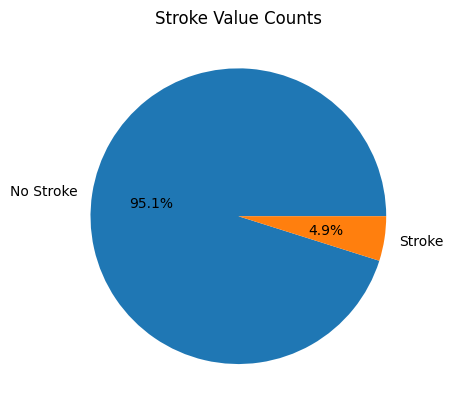

In [33]:
# Plot a pie chart of stroke values before removing unknown smokers
stroke_counts = df['stroke'].value_counts()
print(stroke_counts)
plt.pie(stroke_counts, labels=['No Stroke', 'Stroke'], autopct='%1.1f%%')
plt.title('Stroke Value Counts')
plt.show()

1544


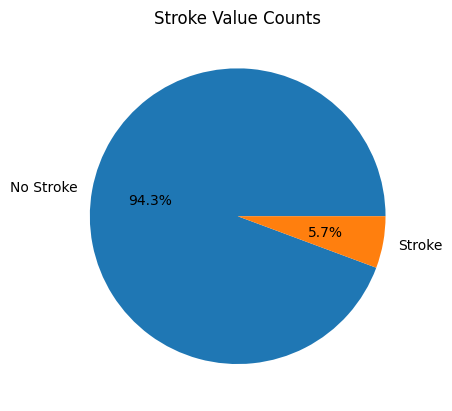

In [34]:
# Removing unknown smokers
print((df['smoking_status'] == 'Unknown').sum())
df= df[df['smoking_status'] != 'Unknown']


# Plot a pie chart of stroke values
stroke_counts = df['stroke'].value_counts()
plt.pie(stroke_counts, labels=['No Stroke', 'Stroke'], autopct='%1.1f%%')
plt.title('Stroke Value Counts')
plt.show()

In [35]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.471292,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5102,Female,57.0,0,0,Yes,Private,Rural,77.93,21.700000,never smoked,0
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.824431,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0


In [36]:
#Crossing age and bmi due to moderate correlation to capture any interactions
df['age_bmi'] = df['age'] * df['bmi']

In [37]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_bmi
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,2452.200000
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.471292,never smoked,1,1858.748804
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,2600.000000
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,1685.600000
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,1896.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
5102,Female,57.0,0,0,Yes,Private,Rural,77.93,21.700000,never smoked,0,1236.900000
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.824431,never smoked,0,2305.954458
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,3240.000000
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,1071.000000


## Chi-Squared Statistic
We conduct the Pearson's Chi-Squared Statistic to test for independence between categorical variables. This is to conclude whether two variables (categorical and the target variable stroke) are related to each other. Null Hypothesis (H0): There is no relationship between the variables Alternative Hypothesis (H1): There is a statistically significant relationship between the variables.


In [19]:
#pip install stats

In [26]:
from scipy import stats
chi_table = pd.DataFrame(columns=["Category", "P-Value",'Chi Square Test Stat', "Conclusion"])
def find_dep(p_value): 
    alpha = 0.05
    if p_value <= alpha: 
        return "Dependent (reject H0)"
    else: 
        return "Independent(Do not reject H0)"
## get the 
cat_variables = ["gender", "hypertension", "heart_disease", "ever_married", "work_type","Residence_type","smoking_status"]
chi_lists = []

for column in cat_variables:
    contigency = pd.crosstab(df[column], df['stroke'])
    stat, p_value, dof, expected = stats.chi2_contingency(contigency)
    conclusion = find_dep(p_value)
    each_col = [column, p_value, stat, conclusion]
    chi_lists.append(each_col)

for i in chi_lists:
    chi_table.loc[len(chi_table)] = i
chi_table

,Category,P-Value,Chi Square Test Stat,Conclusion
0,gender,3.919168e-01,0.732987,Independent(Do not reject H0)
1,hypertension,2.141984e-15,62.929876,Dependent (reject H0)
2,heart_disease,3.620020e-14,57.364946,Dependent (reject H0)
3,ever_married,4.838049e-06,20.900355,Dependent (reject H0)
4,work_type,1.648351e-03,17.355633,Dependent (reject H0)
5,Residence_type,6.939923e-01,0.154797,Independent(Do not reject H0)
6,smoking_status,3.197753e-03,11.490614,Dependent (reject H0)


In [21]:
#pip install imbalanced-learn

## Point Biserial Correlation
Point-biserial correlation is used to measure the relationship between a binary variable, x, and a continuous variable, y. We use this correlation strategy to see the level of correlation between the continuous variables and the target variable, stroke

In [27]:
biser_table = pd.DataFrame(columns=["Category", "Biserial Stats",'P_value', "Conclusion"])
cont_var = ["age", "bmi", "avg_glucose_level", "age_bmi"]
bi_lists = []
for var in cont_var:
   stat, p = stats.pointbiserialr(df[var], df["stroke"])
   each_val = [var, stat, p, find_dep(p)]
   bi_lists.append(each_val)

for i in bi_lists:
    biser_table.loc[len(biser_table)] = i
biser_table

,Category,Biserial Stats,P_value,Conclusion
0,age,0.250765,2.989889e-52,Dependent (reject H0)
1,bmi,0.013262,4.286100e-01,Independent(Do not reject H0)
2,avg_glucose_level,0.128773,1.179848e-14,Dependent (reject H0)
3,age_bmi,0.215296,1.175359e-38,Dependent (reject H0)


## One Hot Encoding

In [38]:
from sklearn.preprocessing import OneHotEncoder

# encoder = OneHotEncoder()
# one_hot = encoder.fit_transform(df[['gender','ever_married','work_type','Residence_type','smoking_status']])


df = pd.get_dummies(df, columns = ['gender','ever_married','work_type','Residence_type','smoking_status']).astype(int)
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,age_bmi,gender_Female,gender_Male,ever_married_No,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228,36,1,2452,0,1,0,...,0,0,1,0,0,0,1,1,0,0
1,61,0,0,202,30,1,1858,1,0,0,...,0,0,0,1,0,1,0,0,1,0
2,80,0,1,105,32,1,2600,0,1,0,...,0,0,1,0,0,1,0,0,1,0
3,49,0,0,171,34,1,1685,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,79,1,0,174,24,1,1896,1,0,0,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,57,0,0,77,21,0,1236,1,0,0,...,0,0,1,0,0,1,0,0,1,0
5105,80,1,0,83,28,0,2305,1,0,0,...,0,0,1,0,0,0,1,0,1,0
5106,81,0,0,125,40,0,3240,1,0,0,...,0,0,0,1,0,0,1,0,1,0
5107,35,0,0,82,30,0,1071,1,0,0,...,0,0,0,1,0,1,0,0,1,0


## Scaling

In [39]:
#Performing standardization on continuous variables
from sklearn.preprocessing import StandardScaler

# Fit the StandardScaler to the training data
scaler = StandardScaler()
df[['age', 'avg_glucose_level', 'bmi', 'age_bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi', 'age_bmi']])

## Hypothesis Testing

In [30]:
numeric = df.select_dtypes(include=np.number).columns.tolist()
tstats_df = pd.DataFrame()
warnings.filterwarnings("ignore")

for eachvariable in numeric:
    tstats = stats.ttest_ind(df.loc[df["stroke"] == 1, eachvariable], df.loc[df["stroke"] == 0, eachvariable])
    temp = pd.DataFrame([eachvariable, tstats[0], tstats[1]]).T
    temp.columns = ["Variable Name", "T stats", " P-value"]
    tstats_df = pd.concat([tstats_df, temp], axis = 0, ignore_index= True)
tstats_df = tstats_df.sort_values(by=" P-value").reset_index(drop=True)
print(tstats_df)

                     Variable Name    T stats   P-value
0                           stroke        inf       0.0
1                              age  15.462421       0.0
2                          age_bmi  13.160176       0.0
3                     hypertension   8.114004       0.0
4                    heart_disease   7.785221       0.0
5                avg_glucose_level   7.749491       0.0
6                 ever_married_Yes   4.669437  0.000003
7                  ever_married_No  -4.669437  0.000003
8          work_type_Self-employed   3.623796  0.000294
9   smoking_status_formerly smoked   3.344438  0.000833
10     smoking_status_never smoked  -2.498859  0.012504
11              work_type_children  -2.056443  0.039813
12               work_type_Private  -1.421657  0.155213
13              work_type_Govt_job  -1.077795  0.281198
14                   gender_Female  -0.930103  0.352381
15                     gender_Male   0.930103  0.352381
16          work_type_Never_worked  -0.918672   

At the 0.05 significant level, all the variables are statistically significant since the p-value < 0.05

In [31]:
import xgboost
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import  pyplot
from sklearn.model_selection import train_test_split

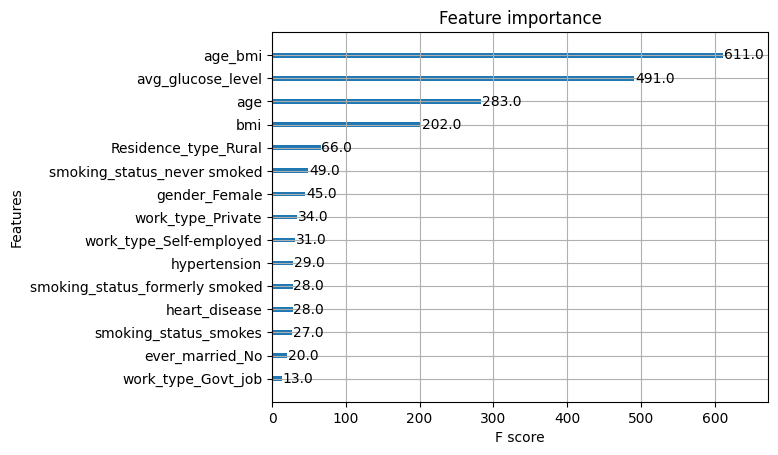

In [32]:
np.random.seed(120)
y_feature_selection = df['stroke'] # dependent variable
x_feature_selection = df.drop(columns=["stroke"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x_feature_selection, y_feature_selection, test_size=0.33, random_state=7)
model = XGBClassifier()
model.fit(x_feature_selection, y_feature_selection)
# plot feature importance
plot_importance(model)
plt.show()

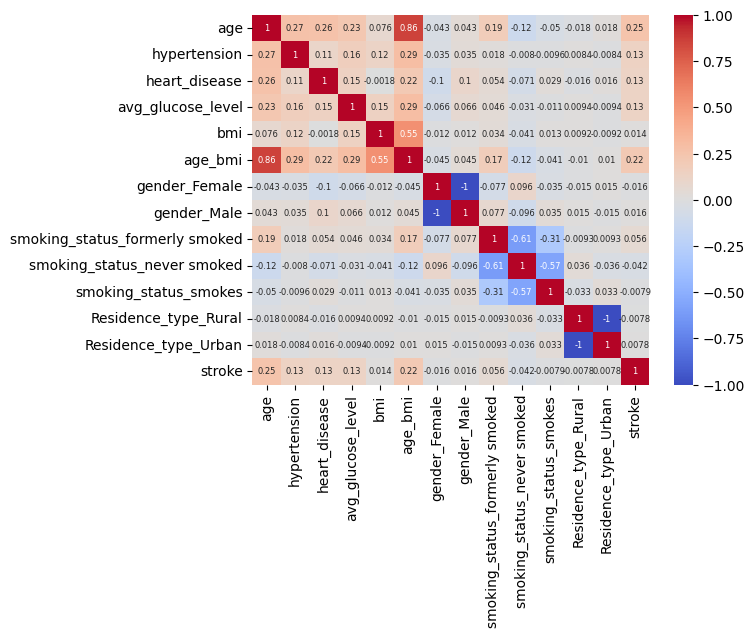

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# num_cols = df.select_dtypes(include=['float64', 'int64']).columns
# corr_matrix = df[num_cols].corr()
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.show()

#roughly choose variables to check correlation based on feature importance from  xgboost above
variables_to_plot = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'age_bmi', 'gender_Female', 'gender_Male', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes', 'Residence_type_Rural', 'Residence_type_Urban', 'stroke']
corr_matrix2 = df[variables_to_plot].corr()

#plot after scaling for more accurate correlation
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm', annot_kws={"fontsize":6})
plt.show()

# Removing Residence Type, Gender and BMI

In [33]:
#removing residence_type
#to_drop = ['Residence_type','gender','bmi']
to_drop = ['Residence_type_Rural', 'Residence_type_Urban', 'gender_Male', 'gender_Female', 'bmi']
df2= df.drop(to_drop, axis=1)
df2

,age,hypertension,heart_disease,avg_glucose_level,stroke,age_bmi,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.961273,0,1,2.475585,1,1.458851,0,1,0,0,1,0,0,1,0,0
1,0.643316,0,0,1.937029,1,0.560126,0,1,0,0,0,1,0,0,1,0
2,1.650179,0,1,-0.072199,1,1.682776,0,1,0,0,1,0,0,0,1,0
3,0.007403,0,0,1.294905,1,0.298376,0,1,0,0,1,0,0,0,0,1
4,1.597186,1,0,1.357046,1,0.617620,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,0.431345,0,0,-0.652182,0,-0.380964,0,1,0,0,1,0,0,0,1,0
5105,1.650179,1,0,-0.527900,0,1.236439,0,1,0,0,1,0,0,0,1,0
5106,1.703172,0,0,0.342075,0,2.651100,0,1,0,0,0,1,0,0,1,0
5107,-0.734496,0,0,-0.548614,0,-0.630610,0,1,0,0,0,1,0,0,1,0


In [91]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,age_bmi,gender_Female,gender_Male,ever_married_No,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.961273,0,1,2.475585,0.869133,1,1.458851,0,1,0,...,0,0,1,0,0,0,1,1,0,0
1,0.643316,0,0,1.937029,0.029859,1,0.560126,1,0,0,...,0,0,0,1,0,1,0,0,1,0
2,1.650179,0,1,-0.072199,0.309617,1,1.682776,0,1,0,...,0,0,1,0,0,1,0,0,1,0
3,0.007403,0,0,1.294905,0.589375,1,0.298376,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,1.597186,1,0,1.357046,-0.809415,1,0.617620,1,0,0,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,0.431345,0,0,-0.652182,-1.229052,0,-0.380964,1,0,0,...,0,0,1,0,0,1,0,0,1,0
5105,1.650179,1,0,-0.527900,-0.249899,0,1.236439,1,0,0,...,0,0,1,0,0,0,1,0,1,0
5106,1.703172,0,0,0.342075,1.428649,0,2.651100,1,0,0,...,0,0,0,1,0,0,1,0,1,0
5107,-0.734496,0,0,-0.548614,0.029859,0,-0.630610,1,0,0,...,0,0,0,1,0,1,0,0,1,0


In [49]:
from sklearn.model_selection import train_test_split
X = df.drop('stroke', axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109)

X_df2 = df2.drop('stroke', axis=1)
y_df2 = df2['stroke']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_df2, y_df2, test_size=0.3, random_state=109)

df


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,age_bmi,gender_Female,gender_Male,ever_married_No,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.961273,0,1,2.475585,0.869133,1,1.458851,0,1,0,...,0,0,1,0,0,0,1,1,0,0
1,0.643316,0,0,1.937029,0.029859,1,0.560126,1,0,0,...,0,0,0,1,0,1,0,0,1,0
2,1.650179,0,1,-0.072199,0.309617,1,1.682776,0,1,0,...,0,0,1,0,0,1,0,0,1,0
3,0.007403,0,0,1.294905,0.589375,1,0.298376,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,1.597186,1,0,1.357046,-0.809415,1,0.617620,1,0,0,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,0.431345,0,0,-0.652182,-1.229052,0,-0.380964,1,0,0,...,0,0,1,0,0,1,0,0,1,0
5105,1.650179,1,0,-0.527900,-0.249899,0,1.236439,1,0,0,...,0,0,1,0,0,0,1,0,1,0
5106,1.703172,0,0,0.342075,1.428649,0,2.651100,1,0,0,...,0,0,0,1,0,0,1,0,1,0
5107,-0.734496,0,0,-0.548614,0.029859,0,-0.630610,1,0,0,...,0,0,0,1,0,1,0,0,1,0


In [1]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
import xgboost
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import  pyplot

In [50]:
#without resampling (unbalanced dataset)

# # Define model
# xgb_model_unsampled = XGBClassifier()

# # Train model
# xgb_model_unsampled.fit(X_train, y_train)

# # Evaluate model
# y_pred_unsampled = xgb_model_unsampled.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred_unsampled)
# f1 = f1_score(y_test, y_pred_unsampled)
# precision = precision_score(y_test, y_pred_unsampled)
# recall = recall_score(y_test, y_pred_unsampled)

# print('Accuracy Unsampled: %.2f%%' % (accuracy * 100.0))
# print('F1 Score Unsampled: %.2f%%' % (f1 * 100.0))
# print('Precision Unsampled: %.2f%%' % (precision * 100.0))
# print('Recall Unsampled: %.2f%%' % (recall * 100.0))

#Define hyperparameters to tune
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 5, 10, 15],
    'n_estimators': [50, 100, 150],
    'subsample': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 2, 3]
}

# Perform grid search to find best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Retrain model with best hyperparameters
unsampled_best = XGBClassifier(**grid_search.best_params_)
unsampled_best.fit(X_train, y_train)

# Evaluate best model
y_pred_unsampled2 = unsampled_best.predict(X_test)

accuracy2 = accuracy_score(y_test, y_pred_unsampled2)
f12 = f1_score(y_test, y_pred_unsampled2)
precision2 = precision_score(y_test, y_pred_unsampled2)
recall2 = recall_score(y_test, y_pred_unsampled2)

print('Accuracy with best hyperparameters: %.2f%%' % (accuracy2 * 100.0))
print('F1 Score with best hyperparameters: %.2f%%' % (f12 * 100.0))
print('Precision with best hyperparameters: %.2f%%' % (precision2 * 100.0))
print('Recall with best hyperparameters: %.2f%%' % (recall2 * 100.0))


Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 150, 'subsample': 1.0}
Accuracy with best hyperparameters: 95.79%
F1 Score with best hyperparameters: 4.26%
Precision with best hyperparameters: 100.00%
Recall with best hyperparameters: 2.17%


In [35]:
#after resampling
from copy import deepcopy
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE object
smote = SMOTE(random_state = 42, sampling_strategy = 0.5)

# Resample the data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Print the number of samples in each class before and after resampling
print(f"Before resampling: \n{y_train.value_counts()}")
print(f"After resampling: \n{y_resampled.value_counts()}")

Before resampling: 
stroke
0    2339
1     156
Name: count, dtype: int64
After resampling: 
stroke
0    2339
1    1169
Name: count, dtype: int64


In [36]:
# for dataset after dropping selected columns
from copy import deepcopy
from imblearn.over_sampling import SMOTE


# Instantiate SMOTE object
smote = SMOTE(random_state = 42, sampling_strategy = 0.5)

# Resample the data
X_resampled2, y_resampled2 = smote.fit_resample(X_train2, y_train2)

# Print the number of samples in each class before and after resampling
print(f"Before resampling: \n{y_train2.value_counts()}")
print(f"After resampling: \n{y_resampled.value_counts()}")

Before resampling: 
stroke
0    2339
1     156
Name: count, dtype: int64
After resampling: 
stroke
0    2339
1    1169
Name: count, dtype: int64


In [95]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report 

def get_model_results(classifier, model, x_train, y_train, x_test, y_test):
    # fit the model with data 
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print("Results for "+ classifier)
    print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
    print("Recall:", metrics.recall_score(y_test,y_pred))
    print("Precision:", metrics.precision_score(y_test,y_pred))
    print("F1 Score:", metrics.f1_score(y_test,y_pred))

    # confusion matrix 
    cfn_matrix = metrics.confusion_matrix(y_test,y_pred,labels=[1,0])
    print("\nConfusion Matrix:\n")
    print(cfn_matrix)

    # Classification Report 
    print("\nClassification Report:\n")

    print(classification_report(y_test, y_pred))
    
    accuracy = metrics.accuracy_score(y_test,y_pred)
    recall = metrics.recall_score(y_test,y_pred)
    precision = metrics.precision_score(y_test,y_pred)
    f1 = metrics.f1_score(y_test,y_pred)
    results = [accuracy, recall, precision, f1]

    print(results)
    # print the auc curve and show auc score 
    #plot roc curve 
    import matplotlib.pyplot as plt 
    # predicted probabilities of class 1 
    by_pred_prob_model = model.predict_proba(x_test)[:,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, by_pred_prob_model)
    auc = metrics.roc_auc_score(y_test, by_pred_prob_model)
    plt.plot(fpr,tpr,label="XGB_Model, auc ="+str("{:.3f}".format(auc)))
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.legend(loc=4)
    plt.show()
    ab_auc = auc
    print("AUC Score:" , ab_auc)


    return

# XGBOOST


In [37]:
#xgb model before dropping variables
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb_model = XGBClassifier()
#Define hyperparameters to tune
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 5, 10, 15],
    'n_estimators': [50, 100, 150],
    'subsample': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 2, 3]
}

# Perform grid search to find best hyperparameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring = 'f1')
grid_search.fit(X_resampled, y_resampled)

# Print best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Retrain model with best hyperparameters
xgb_best = XGBClassifier(**grid_search.best_params_)
xgb_best.fit(X_resampled, y_resampled)

# Evaluate best model
y_pred_xgb = xgb_best.predict(X_test)

xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)

print('Accuracy with best hyperparameters: %.2f%%' % (xgb_accuracy * 100.0))
print('F1 Score with best hyperparameters: %.2f%%' % (xgb_f1 * 100.0))
print('Precision with best hyperparameters: %.2f%%' % (xgb_precision * 100.0))
print('Recall with best hyperparameters: %.2f%%' % (xgb_recall * 100.0))

Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 15, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 1.0}
Accuracy with best hyperparameters: 93.46%
F1 Score with best hyperparameters: 14.63%
Precision with best hyperparameters: 16.67%
Recall with best hyperparameters: 13.04%


Results for XGB
Accuracy: 0.9345794392523364
Recall: 0.13043478260869565
Precision: 0.16666666666666666
F1 Score: 0.14634146341463414

Confusion Matrix:

[[  6  40]
 [ 30 994]]

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1024
           1       0.17      0.13      0.15        46

    accuracy                           0.93      1070
   macro avg       0.56      0.55      0.56      1070
weighted avg       0.93      0.93      0.93      1070

[0.9345794392523364, 0.13043478260869565, 0.16666666666666666, 0.14634146341463414]


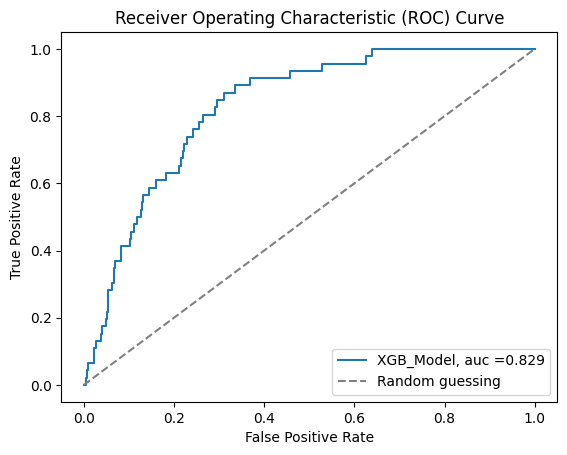

AUC Score: 0.8285071331521738


In [113]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import xgboost as xgb

# Calculate ROC curve and AUC
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb2)
# roc_auc = auc(fpr, tpr)

# Plot ROC curve
# plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
# plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guessing')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()

# confusion matrix
# from sklearn.metrics import confusion_matrix
# matrix = confusion_matrix(y_test, y_pred_xgb2)
# print(matrix)

get_model_results('XGB', xgb_best, X_resampled, y_resampled, X_test, y_test)

In [111]:
#xgb model after dropping residence_type,bmi,gender
xgb_model = XGBClassifier()

#Define hyperparameters to tune
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 5, 10, 15],
    'n_estimators': [50, 100, 150],
    'subsample': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 2, 3]
}

# Perform grid search to find best hyperparameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5)
grid_search.fit(X_resampled2, y_resampled2)

# Print best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Retrain model with best hyperparameters
xgb_best2 = XGBClassifier(**grid_search.best_params_)
xgb_best2.fit(X_resampled2, y_resampled2)

# Evaluate best model
y_pred_xgb2 = xgb_best2.predict(X_test2)

xgb_accuracy2 = accuracy_score(y_test2, y_pred_xgb2)
xgb_f12 = f1_score(y_test2, y_pred_xgb2)
xgb_precision2 = precision_score(y_test2, y_pred_xgb2)
xgb_recall2 = recall_score(y_test2, y_pred_xgb2)

print('Accuracy with best hyperparameterss: %.2f%%' % (xgb_accuracy2 * 100.0))
print('F1 Score with best hyperparameters: %.2f%%' % (xgb_f12 * 100.0))
print('Precision with best hyperparameters: %.2f%%' % (xgb_precision2 * 100.0))
print('Recall with best hyperparameters: %.2f%%' % (xgb_recall2 * 100.0))


Best hyperparameters:  {'learning_rate': 0.2, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 150, 'subsample': 1.0}
Accuracy with best hyperparameterss: 91.78%
F1 Score with best hyperparameters: 16.98%
Precision with best hyperparameters: 15.00%
Recall with best hyperparameters: 19.57%


Results for XGB
Accuracy: 0.9177570093457944
Recall: 0.1956521739130435
Precision: 0.15
F1 Score: 0.16981132075471697

Confusion Matrix:

[[  9  37]
 [ 51 973]]

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1024
           1       0.15      0.20      0.17        46

    accuracy                           0.92      1070
   macro avg       0.56      0.57      0.56      1070
weighted avg       0.93      0.92      0.92      1070

[0.9177570093457944, 0.1956521739130435, 0.15, 0.16981132075471697]


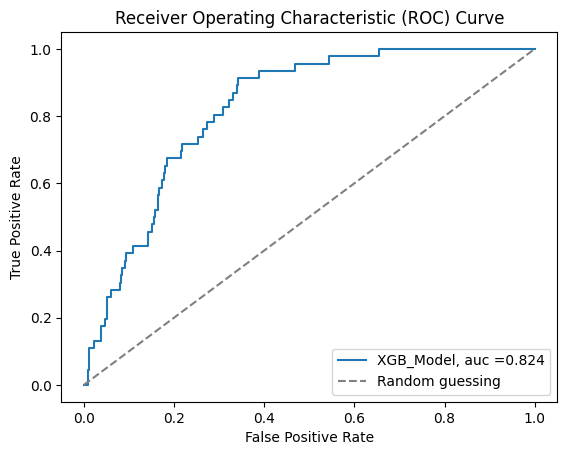

AUC Score: 0.8235394021739131


In [114]:
# # Calculate ROC curve and AUC
# fpr2, tpr2, thresholds2 = roc_curve(y_test2, y_pred_best2)
# roc_auc2 = auc(fpr2, tpr2)
# print(roc_auc2)

# # Plot ROC curve
# plt.plot(fpr2, tpr2, label='AUC = %0.2f' % roc_auc2)
# plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guessing')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()

get_model_results('XGB', xgb_best2, X_resampled2, y_resampled2, X_test2, y_test2)

# SVM

In [108]:
#hyperparameter tuning for svm1
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import svm
from sklearn.ensemble import BaggingClassifier

n_estimators = 10

param_grid = {
    'base_estimator__C': [0.1,1, 10, 100, 1000], 
    'base_estimator__gamma': [1,0.1,0.01,0.001, 0.0001],
    'base_estimator__kernel':  ['linear', 'poly', 'rbf', 'sigmoid']
}


svm = svm.SVC()

bagging_svm = BaggingClassifier(svm, random_state = 88,max_samples=1.0 / n_estimators, n_estimators=n_estimators)

grid_search = GridSearchCV(
    bagging_svm,
    param_grid=param_grid,
    scoring = 'f1'
)

grid_search.fit(X_resampled, y_resampled)


print('Best hyper parameters:', grid_search.best_params_, 'Score', grid_search.best_score_)

Best hyper parameters: {'base_estimator__C': 1000, 'base_estimator__gamma': 0.1, 'base_estimator__kernel': 'rbf'} Score 0.7928185542328284


Results for SVM
Accuracy: 0.9009345794392524
Recall: 0.30434782608695654
Precision: 0.1590909090909091
F1 Score: 0.20895522388059704

Confusion Matrix:

[[ 14  32]
 [ 74 950]]

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1024
           1       0.16      0.30      0.21        46

    accuracy                           0.90      1070
   macro avg       0.56      0.62      0.58      1070
weighted avg       0.93      0.90      0.92      1070

[0.9009345794392524, 0.30434782608695654, 0.1590909090909091, 0.20895522388059704]


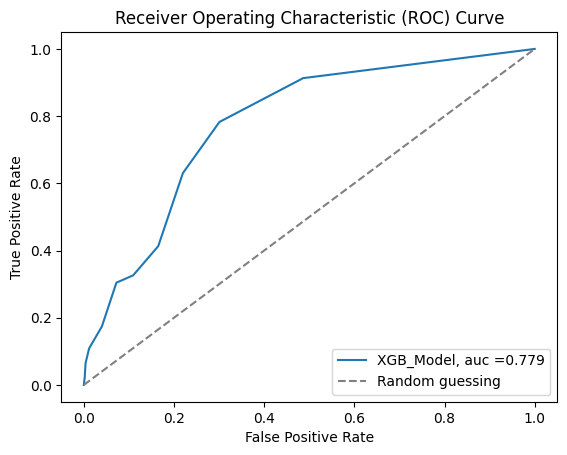

AUC Score: 0.779211956521739


In [109]:
#svm before dropping variables
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report


svm1 = BaggingClassifier(svm.SVC(kernel=grid_search.best_params_['base_estimator__kernel'], gamma = grid_search.best_params_['base_estimator__gamma'], C = grid_search.best_params_['base_estimator__C'] ), random_state = 88,max_samples=1.0 / n_estimators, n_estimators=n_estimators )
svm1.fit(X_resampled, y_resampled)
y_pred_SVM = svm1.predict(X_test)
get_model_results('SVM', svm1, X_resampled, y_resampled, X_test, y_test)

In [115]:
#hyperparameter tuning for svm2
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import svm
from sklearn.ensemble import BaggingClassifier

n_estimators = 10

param_grid = {
    'base_estimator__C': [0.1,1, 10, 100, 1000], 
    'base_estimator__gamma': [1,0.1,0.01,0.001, 0.0001],
    'base_estimator__kernel':  ['linear', 'poly', 'rbf', 'sigmoid']
}


svm2 = svm.SVC()

bagging_svm = BaggingClassifier(svm, random_state = 88,max_samples=1.0 / n_estimators, n_estimators=n_estimators)

grid_search2 = GridSearchCV(
    bagging_svm,
    param_grid=param_grid,
    scoring = 'f1'
)

grid_search2.fit(X_resampled2, y_resampled2)


print('Best hyper parameters:', grid_search2.best_params_, 'Score', grid_search2.best_score_)

Best hyper parameters: {'base_estimator__C': 100, 'base_estimator__gamma': 0.1, 'base_estimator__kernel': 'rbf'} Score 0.7628657845784116


Results for SVM with dropped columns
Accuracy: 0.8616822429906542
Recall: 0.41304347826086957
Precision: 0.1357142857142857
F1 Score: 0.2043010752688172

Confusion Matrix:

[[ 19  27]
 [121 903]]

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1024
           1       0.14      0.41      0.20        46

    accuracy                           0.86      1070
   macro avg       0.55      0.65      0.56      1070
weighted avg       0.94      0.86      0.89      1070

[0.8616822429906542, 0.41304347826086957, 0.1357142857142857, 0.2043010752688172]


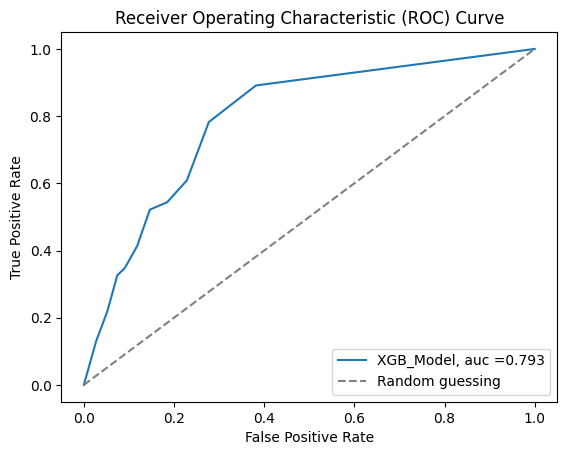

AUC Score: 0.7929581351902174


In [123]:
#svm after dropping variables
from sklearn import svm

svm2 = BaggingClassifier(svm.SVC(kernel=grid_search2.best_params_['base_estimator__kernel'], gamma = grid_search2.best_params_['base_estimator__gamma'], C = grid_search2.best_params_['base_estimator__C'] ), random_state = 88,max_samples=1.0 / n_estimators, n_estimators=n_estimators, )
svm2.fit(X_resampled2, y_resampled2)
y_pred_SVM2 = svm2.predict(X_test2)
get_model_results('SVM with dropped columns', svm2, X_resampled2, y_resampled2, X_test2, y_test2)

# LOG REGRESSION

In [124]:
from sklearn.linear_model import LogisticRegression

In [125]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5,scoring = 'f1')
grid_search.fit(X_resampled, y_resampled)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'C': 100, 'penalty': 'l2'}


In [40]:
logreg = LogisticRegression(C=10, penalty='l2')
# Fit the logistic regression model to the entire training set
logreg.fit(X_resampled, y_resampled)
y_pred_logreg= logreg.predict(X_test)


Results for Logistic Regression 
Accuracy: 0.9205607476635514
Recall: 0.21739130434782608
Precision: 0.1694915254237288
F1 Score: 0.19047619047619047

Confusion Matrix:

[[ 10  36]
 [ 49 975]]

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1024
           1       0.17      0.22      0.19        46

    accuracy                           0.92      1070
   macro avg       0.57      0.58      0.57      1070
weighted avg       0.93      0.92      0.93      1070

[0.9205607476635514, 0.21739130434782608, 0.1694915254237288, 0.19047619047619047]


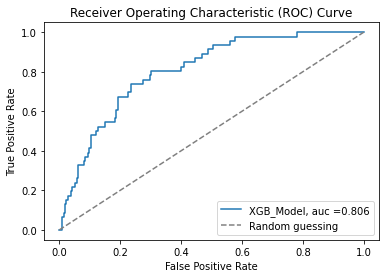

AUC Score: 0.8062160326086958


In [41]:
get_model_results("Logistic Regression ", logreg, X_resampled, y_resampled, X_test, y_test)

+--------------------------------+----------------------+
|          Feature Name          |     Coefficient      |
+--------------------------------+----------------------+
|              age               |  1.2547877832387557  |
|          hypertension          | -0.49197843332171465 |
|         heart_disease          | -0.25404497690732597 |
|       avg_glucose_level        |  0.2634887016773859  |
|              bmi               | -0.19269536744573937 |
|            age_bmi             |  0.4677932703446362  |
|         gender_Female          |  -5.614178664327877  |
|          gender_Male           |  -5.819921390566978  |
|        ever_married_No         |  -5.412100614840089  |
|        ever_married_Yes        |  -4.605000283215842  |
|       work_type_Govt_job       |  -6.002001162293365  |
|     work_type_Never_worked     | -2.6161673835953527  |
|       work_type_Private        |  -5.17194959916434   |
|    work_type_Self-employed     |  -5.860343340517614  |
|       work_t

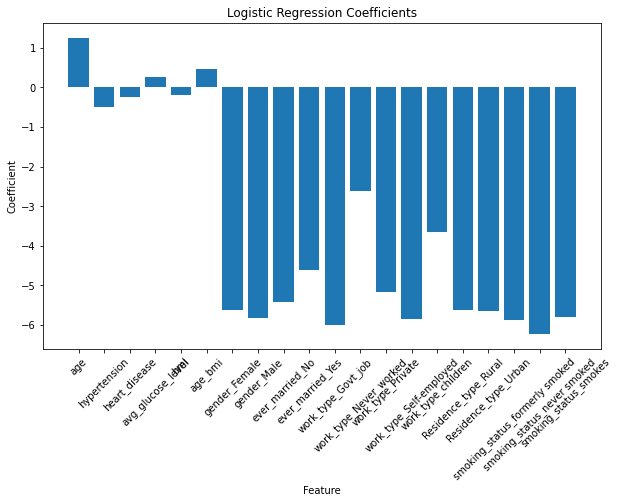

In [42]:
feature_names = X_resampled.columns
coefficients = logreg.coef_[0]
from prettytable import PrettyTable


table = PrettyTable()
table.field_names = ['Feature Name', 'Coefficient']
for feature, coef in zip(feature_names, coefficients):
    table.add_row([feature, coef])

# Print the table
print(table)

plt.figure(figsize=(10, 6))
plt.bar(feature_names, coefficients)
plt.xticks(feature_names, rotation=45)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Logistic Regression Coefficients')
plt.show()

In [43]:
param_grid2 = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
grid_search2 = GridSearchCV(LogisticRegression(), param_grid2, cv=5, scoring = 'f1')
grid_search2.fit(X_resampled2, y_resampled2)
best_params2 = grid_search2.best_params_
print("Best Hyperparameters:", best_params2)

Best Hyperparameters: {'C': 10, 'penalty': 'l2'}


In [44]:
logreg2 = LogisticRegression(**best_params2)

# Fit the logistic regression model to the entire training set
logreg2.fit(X_resampled2, y_resampled2)
y_pred_logreg2= logreg2.predict(X_test2)

Results for Logistic Regression 
Accuracy: 0.8495327102803738
Recall: 0.5
Precision: 0.14285714285714285
F1 Score: 0.22222222222222224

Confusion Matrix:

[[ 23  23]
 [138 886]]

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1024
           1       0.14      0.50      0.22        46

    accuracy                           0.85      1070
   macro avg       0.56      0.68      0.57      1070
weighted avg       0.94      0.85      0.89      1070

[0.8495327102803738, 0.5, 0.14285714285714285, 0.22222222222222224]


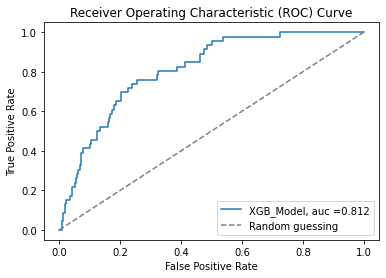

AUC Score: 0.8122877038043478


In [45]:
get_model_results("Logistic Regression ", logreg2, X_resampled2, y_resampled2, X_test2, y_test2)

+--------------------------------+---------------------+
|          Feature Name          |     Coefficient     |
+--------------------------------+---------------------+
|              age               |  1.7346761453668542 |
|          hypertension          | -0.4266035242320804 |
|         heart_disease          |  -0.576390693556759 |
|       avg_glucose_level        |  0.2623049588412927 |
|            age_bmi             | 0.17704876755729454 |
|        ever_married_No         |  -4.845046814970849 |
|        ever_married_Yes        |  -4.221868185710045 |
|       work_type_Govt_job       |  -5.537746792054572 |
|     work_type_Never_worked     |  -2.301944994667835 |
|       work_type_Private        |  -4.570363178394413 |
|    work_type_Self-employed     |  -5.106993772803376 |
|       work_type_children       |  -3.265044775584467 |
| smoking_status_formerly smoked |  -5.490204080007504 |
|  smoking_status_never smoked   |  -5.757445062027314 |
|     smoking_status_smokes    

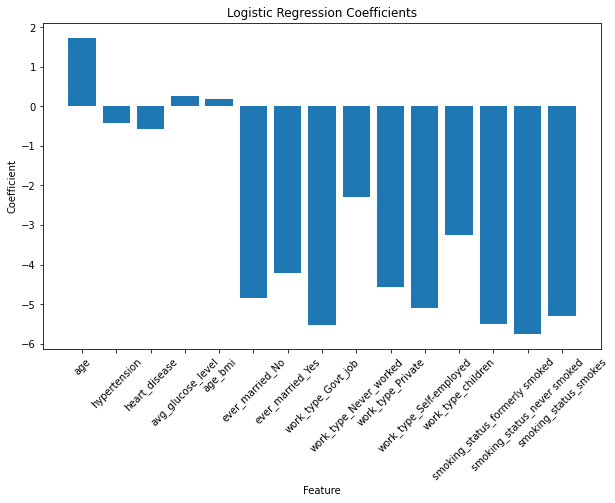

In [46]:
feature_names2 = X_resampled2.columns
coefficients2 = logreg2.coef_[0]
from prettytable import PrettyTable


table2 = PrettyTable()
table2.field_names = ['Feature Name', 'Coefficient']
for feature2, coef2 in zip(feature_names2, coefficients2):
    table2.add_row([feature2, coef2])

# Print the table
print(table2)

plt.figure(figsize=(10, 6))
plt.bar(feature_names2, coefficients2)
plt.xticks(feature_names2, rotation=45)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Logistic Regression Coefficients')
plt.show()


# AdaBoost

In [126]:
# import AdaBoost Model 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report 

In [127]:
grid_params = {
    'n_estimators': [50,100,200,400],
    'algorithm': ['SAMME','SAMME.R'],
    'learning_rate': [0.001,0.05,0.1,0.2],
}

In [128]:
abModel = AdaBoostClassifier(random_state=23)
gridCV = GridSearchCV(abModel, param_grid=grid_params, verbose=False)
gridCV.fit(X_resampled, y_resampled)
print('Best hyper parameters:', gridCV.best_params_, 'Score', gridCV.best_score_)

Best hyper parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.2, 'n_estimators': 400} Score 0.8574791405033915


In [129]:
good_AB = AdaBoostClassifier(n_estimators = 400, learning_rate = 0.2, algorithm = 'SAMME.R', random_state=23)

Results for Ada Boosting
Accuracy: 0.897196261682243
Recall: 0.32608695652173914
Precision: 0.1595744680851064
F1 Score: 0.2142857142857143

Confusion Matrix:

[[ 15  31]
 [ 79 945]]

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      1024
           1       0.16      0.33      0.21        46

    accuracy                           0.90      1070
   macro avg       0.56      0.62      0.58      1070
weighted avg       0.93      0.90      0.91      1070

[0.897196261682243, 0.32608695652173914, 0.1595744680851064, 0.2142857142857143]


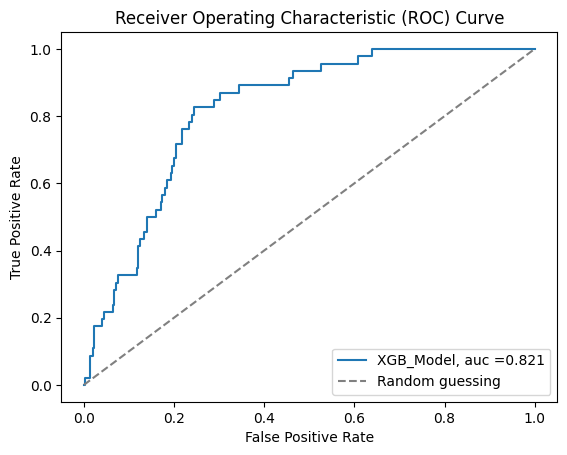

AUC Score: 0.8214801290760869


In [130]:
get_model_results("Ada Boosting", good_AB, X_resampled, y_resampled, X_test, y_test)

# Ada Boost on dropped column dataset

In [131]:
grid_params = {
    'n_estimators': [50,100,200,400],
    'algorithm': ['SAMME','SAMME.R'],
    'learning_rate': [0.01,0.05,0.1,0.2],
}

In [132]:
abModel = AdaBoostClassifier(random_state=23)
gridCV = GridSearchCV(abModel, param_grid=grid_params, verbose=False)
gridCV.fit(X_resampled2, y_resampled2)
print('Best hyper parameters:', gridCV.best_params_, 'Score', gridCV.best_score_)

Best hyper parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.2, 'n_estimators': 400} Score 0.7964673990351594


In [133]:
AB_dropped = AdaBoostClassifier(n_estimators = 400, learning_rate = 0.2, algorithm = 'SAMME.R', random_state=23)

Results for Ada Boosting
Accuracy: 0.8485981308411215
Recall: 0.43478260869565216
Precision: 0.1282051282051282
F1 Score: 0.19801980198019803

Confusion Matrix:

[[ 20  26]
 [136 888]]

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1024
           1       0.13      0.43      0.20        46

    accuracy                           0.85      1070
   macro avg       0.55      0.65      0.56      1070
weighted avg       0.94      0.85      0.89      1070

[0.8485981308411215, 0.43478260869565216, 0.1282051282051282, 0.19801980198019803]


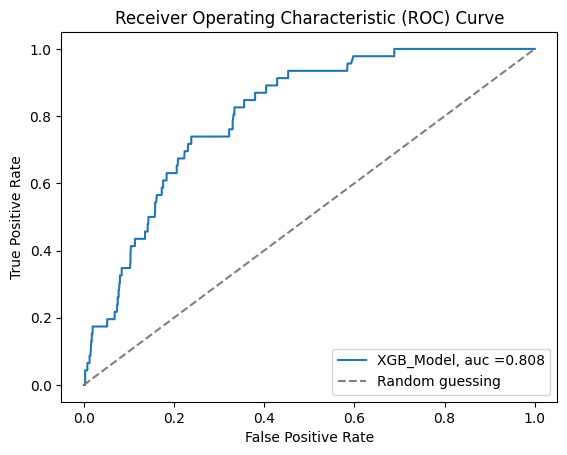

AUC Score: 0.8075853430706522


In [134]:
get_model_results("Ada Boosting", AB_dropped, X_resampled2, y_resampled2, X_test2, y_test2)

# Neural Network

In [ ]:
import keras.layers as layers
import keras.models
import tensorflow as tf

In [ ]:
pip install scikeras

In [43]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scikeras.wrappers import KerasClassifier

# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = keras.models.Sequential()
    model.add(layers.Dense(11, activation='relu', input_dim=20))
    model.add(layers.Dense(7, activation='relu', input_dim=20))
    model.add(layers.Dense(5, activation='relu', input_dim=20))
    model.add(layers.Dense(1, activation='sigmoid', name='predictions'))
    # return model without compile
    return model

# fix random seed for reproducibility
tf.random.set_seed(109)

# hyperparameter tuning

# create model
model = KerasClassifier(model=create_model, loss="binary_crossentropy", verbose=False, optimizer = keras.optimizers.Adam(lr=1e-5))

# define the grid search parameters
epochs = [250, 500, 750, 1000]
batch_size = [10, 20, 40, 60, 80, 100]
param_grid = dict(epochs=epochs, batch_size=batch_size)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1')
grid_result = grid.fit(X_resampled, y_resampled)

In [44]:
# summarize results
print('Best hyper parameters:', grid.best_params_, 'Score', grid.best_score_)

Best hyper parameters: {'batch_size': 10, 'epochs': 1000} Score 0.7541565103955369


In [45]:
model = keras.models.Sequential()
model.add(layers.Dense(11, activation='relu'))
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid', name='predictions'))

In [97]:
model.compile(loss='binary_crossentropy', 
              optimizer=keras.optimizers.Adam(lr=1e-5), 
              metrics=['accuracy',
                       keras.metrics.Precision(name='precision'),
                       keras.metrics.Recall(name='recall')])

In [98]:
model.fit(X_resampled, y_resampled, epochs=1000, batch_size=10)

Epoch 1/1000
351/351 [==============================] - 1s 1ms/step - loss: 0.8235 - accuracy: 0.3224 - precision: 0.3167 - recall: 0.8931
Epoch 2/1000
351/351 [==============================] - 0s 1ms/step - loss: 0.8110 - accuracy: 0.3196 - precision: 0.3111 - recall: 0.8580
Epoch 3/1000
351/351 [==============================] - 0s 1ms/step - loss: 0.7997 - accuracy: 0.3141 - precision: 0.3020 - recall: 0.8067
Epoch 4/1000
351/351 [==============================] - 0s 1ms/step - loss: 0.7892 - accuracy: 0.3087 - precision: 0.2908 - recall: 0.7468
Epoch 5/1000
351/351 [==============================] - 0s 1ms/step - loss: 0.7796 - accuracy: 0.3076 - precision: 0.2811 - recall: 0.6920
Epoch 6/1000
351/351 [==============================] - 0s 1ms/step - loss: 0.7707 - accuracy: 0.3181 - precision: 0.2800 - recall: 0.6655
Epoch 7/1000
351/351 [==============================] - 0s 1ms/step - loss: 0.7625 - accuracy: 0.3230 - precision: 0.2753 - recall: 0.6322
Epoch 8/1000
351/351 [=====

In [99]:
predictions = model.predict(X_test)
y_pred = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

34/34 [==============================] - 0s 979us/step


In [5]:
def get_model_results_nn(classifier, predictions, y_pred, y_test):
    
    print("Results for "+ classifier)
    print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
    print("Recall:", metrics.recall_score(y_test,y_pred))
    print("Precision:", metrics.precision_score(y_test,y_pred))
    print("F1 Score:", metrics.f1_score(y_test,y_pred))

    # confusion matrix 
    cfn_matrix = metrics.confusion_matrix(y_test,y_pred,labels=[1,0])
    print("\nConfusion Matrix:\n")
    print(cfn_matrix)

    # Classification Report 
    print("\nClassification Report:\n")

    print(classification_report(y_test, y_pred))
    
    accuracy = metrics.accuracy_score(y_test,y_pred)
    recall = metrics.recall_score(y_test,y_pred)
    precision = metrics.precision_score(y_test,y_pred)
    f1 = metrics.f1_score(y_test,y_pred)
    results = [accuracy, recall, precision, f1]

    print(results)
    # print the auc curve and show auc score 
    
    # predicted probabilities of class 1 
    by_pred_prob_model = predictions.ravel()
    fpr, tpr, _ = metrics.roc_curve(y_test, by_pred_prob_model)
    auc = metrics.roc_auc_score(y_test, by_pred_prob_model)
    
    # plot roc curve 
    plt.plot(fpr, tpr, label='AUC = %0.2f' % auc)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guessing')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()


Results for Neural Network
Accuracy: 0.8813084112149533
Recall: 0.41304347826086957
Precision: 0.15966386554621848
F1 Score: 0.2303030303030303

Confusion Matrix:

[[ 19  27]
 [100 924]]

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.90      0.94      1024
           1       0.16      0.41      0.23        46

    accuracy                           0.88      1070
   macro avg       0.57      0.66      0.58      1070
weighted avg       0.94      0.88      0.91      1070

[0.8813084112149533, 0.41304347826086957, 0.15966386554621848, 0.2303030303030303]


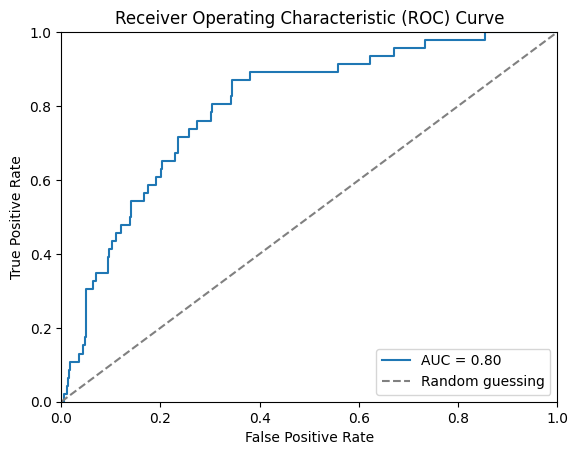

In [103]:
from sklearn import metrics
from sklearn.metrics import classification_report
get_model_results_nn("Neural Network", predictions, y_pred, y_test)

## Dataset without Residence Type

In [38]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scikeras.wrappers import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model2():
    # create model
    model = keras.models.Sequential()
    model.add(layers.Dense(11, activation='relu', input_dim=15))
    model.add(layers.Dense(7, activation='relu', input_dim=15))
    model.add(layers.Dense(5, activation='relu', input_dim=15))
    model.add(layers.Dense(1, activation='sigmoid', name='predictions'))
    # return model without compile
    return model

# fix random seed for reproducibility
tf.random.set_seed(109)

# hyperparameter tuning
# create model
model2 = KerasClassifier(model=create_model2, loss="binary_crossentropy", verbose=False, optimizer = keras.optimizers.Adam(lr=1e-5))

epochs = [500, 1000]
batch_size = [10, 40, 80]
param_grid = dict(epochs=epochs, batch_size=batch_size)

grid2 = GridSearchCV(estimator=model2, param_grid=param_grid, scoring='f1')
grid_result2 = grid2.fit(X_resampled2, y_resampled2)

# grid2 = GridSearchCV(estimator=model2, param_grid=param_grid, scoring='f1')
# grid_result2 = grid2.fit(X_resampled2, y_resampled2)


In [39]:
# summarize results
print('Best hyper parameters:', grid2.best_params_, 'Score', grid2.best_score_)

Best hyper parameters: {'batch_size': 10, 'epochs': 1000} Score 0.7083326473265676


In [42]:
model2 = keras.models.Sequential()
model2.add(layers.Dense(11, activation='relu'))
model2.add(layers.Dense(7, activation='relu'))
model2.add(layers.Dense(5, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid', name='predictions'))

In [44]:
model2.compile(loss='binary_crossentropy', 
               optimizer=keras.optimizers.Adam(lr=1e-5), 
               metrics=['accuracy',
                        keras.metrics.Precision(name='precision'),
                        keras.metrics.Recall(name='recall')])

In [45]:
# fit the model with data 
model2.fit(X_resampled2, y_resampled2, epochs=1000, batch_size=20)

predictions2 = model2.predict(X_test2)
y_pred2 = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions2)
]

Epoch 1/1000
176/176 [==============================] - 1s 1ms/step - loss: 0.6909 - accuracy: 0.6066 - precision: 0.3792 - recall: 0.2831
Epoch 2/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.6900 - accuracy: 0.6229 - precision: 0.3948 - recall: 0.2472
Epoch 3/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.6892 - accuracy: 0.6271 - precision: 0.3929 - recall: 0.2181
Epoch 4/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.6883 - accuracy: 0.6348 - precision: 0.4067 - recall: 0.2087
Epoch 5/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.6875 - accuracy: 0.6434 - precision: 0.4257 - recall: 0.2010
Epoch 6/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.6867 - accuracy: 0.6508 - precision: 0.4451 - recall: 0.1942
Epoch 7/1000
176/176 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.6545 - precision: 0.4545 - recall: 0.1839
Epoch 8/1000
176/176 [=====

Results for Neural Network 2
Accuracy: 0.8261682242990654
Recall: 0.6086956521739131
Precision: 0.14285714285714285
F1 Score: 0.23140495867768596

Confusion Matrix:

[[ 28  18]
 [168 856]]

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.84      0.90      1024
           1       0.14      0.61      0.23        46

    accuracy                           0.83      1070
   macro avg       0.56      0.72      0.57      1070
weighted avg       0.94      0.83      0.87      1070

[0.8261682242990654, 0.6086956521739131, 0.14285714285714285, 0.23140495867768596]


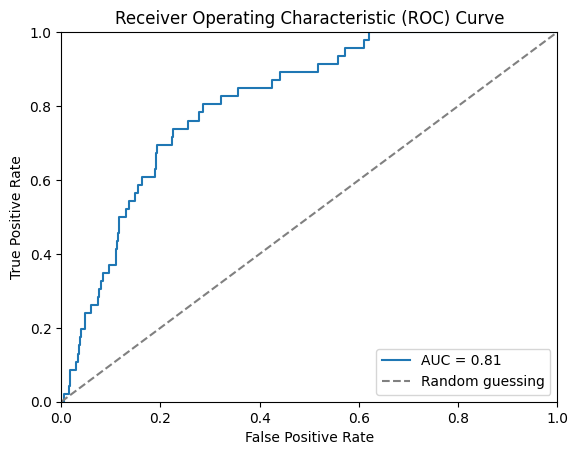

In [47]:
from sklearn import metrics
from sklearn.metrics import classification_report

get_model_results_nn("Neural Network 2", predictions2, y_pred2, y_test2)